# Линейная регрессия и основные библиотеки Python для анализа данных 

## 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

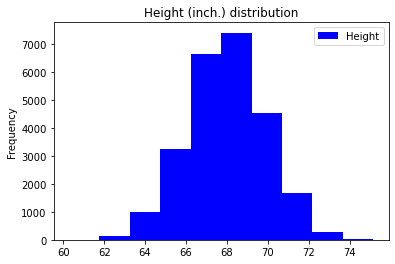

In [3]:
data.plot(y='Height', kind='hist', 
           color='blue',  title='Height (inch.) distribution')

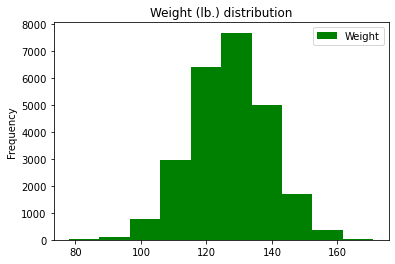

In [4]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lb.) distribution');

In [5]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавим третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'],
                                              row['Weight']), axis=1)

Построим картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

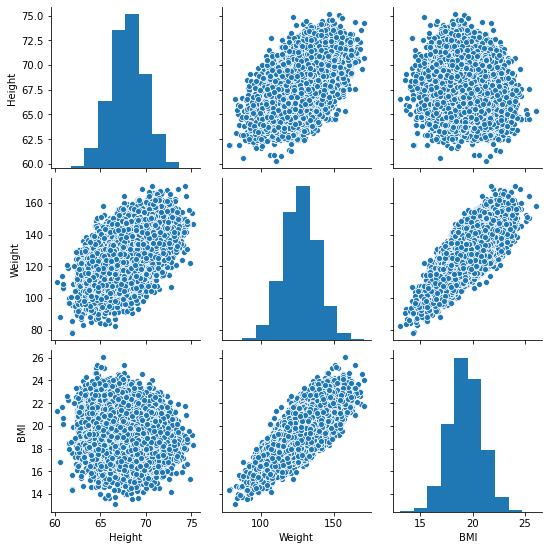

In [8]:
sns.pairplot(data)

Создим в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Построим boxplot, демонстрирующий зависимость роста от весовой категории.

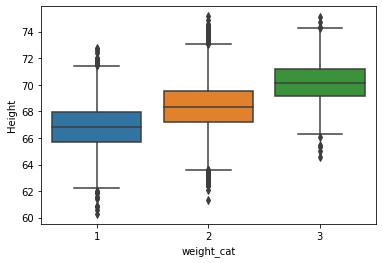

In [9]:
def weight_category(weight):
    return 1 if weight < 120 else 3 if weight >= 150 else 2


data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=data)

Построим scatter plot зависимости роста от веса

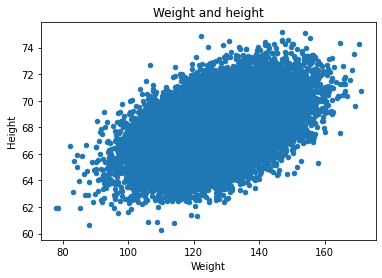

In [10]:
data.plot(x='Weight', y='Height', kind='scatter', title='Weight and height')

## 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Напишем функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [11]:
def err(w0, w1):
    return np.sum((data['Height'] - (w0 + w1 * data['Weight']))**2)

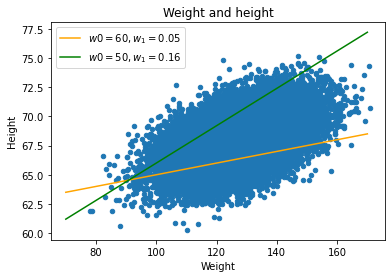

In [12]:
# Ваш код здесь
data.plot(x='Weight', y='Height', kind='scatter', title='Weight and height')
def fun1 (x):
    return 60 + 0.05 * x
def fun2 (x):
    return 50 + 0.16 * x
x = np.linspace(70, 170, 170) 
plt.plot(x, fun1 (x) ,color='orange') 
plt.plot(x, fun2(x),color='green')
plt.legend(( '$w0=60, w_1=0.05$', '$w0=50, w_1=0.16$' ));

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Построим график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 50. 

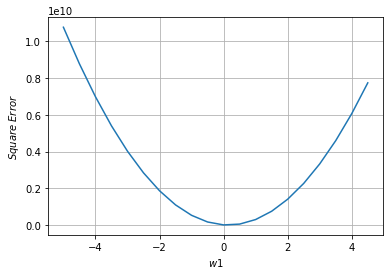

In [13]:
w0 = 50.0
x = np.arange(-5.0, 5.0, 0.5)
plt.plot(x, [err(w0, w1) for w1 in x])
plt.xlabel('$w1$')
plt.ylabel('$Square\ Error$')
plt.grid(True)
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

С помощью метода *minimize_scalar* из *scipy.optimize* найдем минимум функции для значений параметра  $w_1$ в диапазоне [-5,5]. 

In [25]:
from scipy.optimize import minimize_scalar as minsc
w0 = 50
w1_opt = minsc(lambda x: err(w0, x), bounds=(-5,5))
w1_opt.x

0.1410920372883438

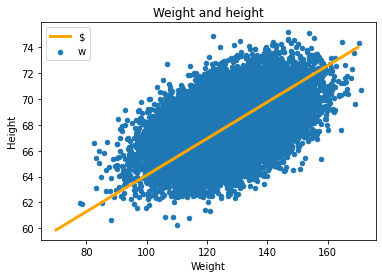

In [26]:
data.plot(x='Weight', y='Height', kind='scatter', title='Weight and height')
def fun_opt (x):
    return w0 + w1_opt.x * x

x = np.linspace(70, 170, 170) 
plt.plot(x, fun_opt (x), color = "orange", lw=3);
plt.legend( '$w_0=50, w_1=%.2f$' % (w1_opt.x));

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Построим 3D-график зависимости функции ошибки, посчитанной от параметров $w_0$ и $w_1$. 

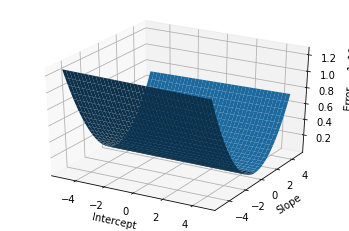

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array([err(w0, w1) for w0, w1 in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Найдем минимум функции ошибки для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). 

In [18]:
from scipy.optimize import minimize   
w_opt = minimize(lambda w: err(w[0], w[1]), x0=[0, 0], method='L-BFGS-B', bounds=([-100.0, 100.0], [-5.0, 5.0]))
w_opt

      fun: 67545.28708667471
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00291038, 0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([57.57179162,  0.08200637])

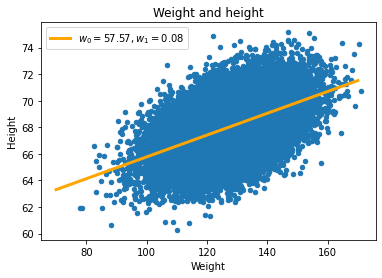

In [23]:
data.plot(x='Weight', y='Height', kind='scatter', title='Weight and height')
def fun_opt (x):
    return w0_opt + w1_opt * x

w0_opt, w1_opt = w_opt.x
x = np.linspace(70, 170, 170) 
plt.plot(x, fun_opt (x), color='orange', lw=3);
plt.legend(( '$w_0=%.2f, w_1=%.2f$' % (w0_opt, w1_opt), ));